<a href="https://colab.research.google.com/github/catnipglitch/google-colab-notebooks-catnip/blob/main/openai/OpenAI_ImageGeneration_Example002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# このノートブックでは、OpenAIのGPT-Image-1モデルを使って、日本語で記述したプロンプトからイラストを生成できます。
# 生成された画像は、Google Driveに保存されます。

## 準備:

### OpenAI APIキーの設定:
まず、OpenAIのウェブサイトでAPIキーを取得してください。
取得したAPIキーを、Google Colabのユーザーデータに `OPENAI_API_KEY` という名前で保存します。

### Google Driveのマウント:
ノートブックを実行すると、Google Driveが自動的にマウントされます。
生成された画像は、`AI_Generated_Images` というフォルダに保存されます。
フォルダが存在しない場合は、自動的に作成されます。

## プロンプトのカスタマイズ:

### プロンプト:
ノートブック内の `prompt` 変数に、生成したいイラストの詳細な説明を日本語で記述してください。
プロンプトを具体的に記述することで、よりイメージに近いイラストが生成されます。
例えば、キャラクターの服装、髪型、表情、背景などを細かく指定できます。

### 画像設定の変更:
`img_size`, `img_quality`, `img_background` 変数で、画像のサイズ、品質、背景を変更できます。
必要に応じて、これらの変数の値を調整してください。

## 実行:

上記の設定が完了したら、ノートブックのセルを順番に実行してください。
しばらくすると、生成されたイラストが表示されます。
画像と生成に使用したプロンプト、パラメータは、Google Driveの`AI_Generated_Images`フォルダに保存されます。

## 注意事項:

* OpenAI APIの利用には料金が発生します。
* プロンプトの内容によっては、意図したイラストが生成されない場合があります。
* より詳細な設定や使い方については、OpenAIのドキュメントを参照してください。

In [2]:
!pip install openai

In [ ]:
# ブロック1: 初期設定（最初に1回だけ実行するのだ）
import os
import base64
import json
import datetime
from pathlib import Path
from openai import OpenAI
from google.colab import userdata, drive
from IPython.display import Image, display

# Googleドライブを一度だけマウントするのだ！
drive.mount('/content/drive')

# 保存先のディレクトリを設定するのだ
SAVE_DIR = '/content/drive/MyDrive/AI_Generated_Images'
os.makedirs(SAVE_DIR, exist_ok=True)

# API接続の準備をするのだ
client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))

# ファイル名を生成する関数を定義するのだ
def generate_unique_filename() -> str:
    """重複しないタイムスタンプベースのファイル名を生成するのだ"""
    timestamp = datetime.datetime.now().strftime('%Y-%m%d-%H%M-%S')
    base_filename = timestamp

    index = 0
    while True:
        filename = base_filename if index == 0 else f"{base_filename}_{index}"
        img_path = os.path.join(SAVE_DIR, f"{filename}.png")
        json_path = os.path.join(SAVE_DIR, f"{filename}.json")

        if not os.path.exists(img_path) and not os.path.exists(json_path):
            return filename

        index += 1

画像が生成されたのだ！表示するのだ～！


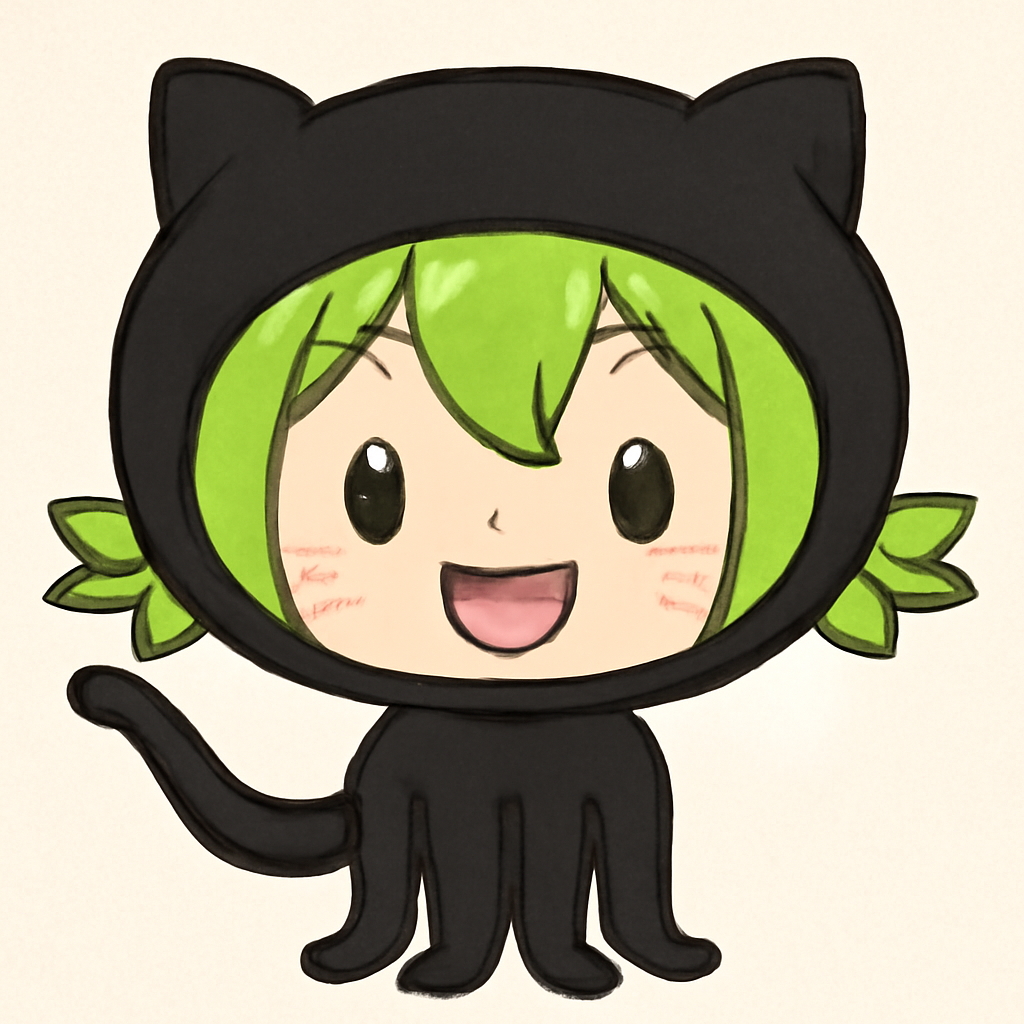

画像を保存したのだ: /content/drive/MyDrive/AI_Generated_Images/2025-0506-0851-15.png
パラメータも保存したのだ: /content/drive/MyDrive/AI_Generated_Images/2025-0506-0851-15.json


In [7]:
# ブロック2: 画像生成（何度でも実行できるのだ！）
prompt = "ずんだもんの頭部中心のアイコン。GithubのOctocatのコスプレをしている。 表情はご機嫌。" # @param {type:"string"}
img_size = '1024x1024' # @param ["1024x1024", "1536x1024", "1024x1536"]
img_quality = 'low' # @param ["high", "medium","low"]
img_background = 'opaque' # @param ["transparent", "opaque"]

try:
    # GPT-Image-1で画像生成を試すのだ！
    response = client.images.generate(
        model="gpt-image-1",
        prompt=prompt,
        n=1,
        size=img_size,
        background=img_background,
        quality=img_quality
    )

    # レスポンスを確認して画像を表示するのだ！
    image_data = response.data[0].b64_json
    image_bytes = base64.b64decode(image_data)
    print("画像が生成されたのだ！表示するのだ～！")
    display(Image(data=image_bytes))

    # ユニークなファイル名を生成するのだ
    filename = generate_unique_filename()
    img_file_path = os.path.join(SAVE_DIR, f"{filename}.png")
    json_file_path = os.path.join(SAVE_DIR, f"{filename}.json")

    # 画像ファイルを保存するのだ
    with open(img_file_path, 'wb') as img_file:
        img_file.write(image_bytes)

    # 生成パラメータをJSONファイルに保存するのだ
    params = {
        "prompt": prompt,
        "size": img_size,
        "quality": img_quality,
        "background": img_background,
        "model": "gpt-image-1",
        "generation_time": datetime.datetime.now().isoformat(),
    }

    with open(json_file_path, 'w', encoding='utf-8') as json_file:
        json.dump(params, json_file, ensure_ascii=False, indent=2)

    print(f"画像を保存したのだ: {img_file_path}")
    print(f"パラメータも保存したのだ: {json_file_path}")

except Exception as e:
    print(f"画像生成でエラーが起きてしまったのだ: {e}")